In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)


In [2]:

df = pd.read_csv("../data/brca_metabric_clinical_data.tsv", sep='\t')
df.head()


,Study ID,Patient ID,Sample ID,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Cancer Type Detailed,Cellularity,Chemotherapy,Pam50 + Claudin-low subtype,...,Relapse Free Status (Months),Relapse Free Status,Number of Samples Per Patient,Sample Type,Sex,3-Gene classifier subtype,TMB (nonsynonymous),Tumor Size,Tumor Stage,Patient's Vital Status
0,brca_metabric,MB-0000,MB-0000,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,NO,claudin-low,...,140.500000,0:Not Recurred,1,Primary,Female,ER-/HER2-,0.000000,22.0,2.0,Living
1,brca_metabric,MB-0002,MB-0002,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,NO,LumA,...,84.633333,0:Not Recurred,1,Primary,Female,ER+/HER2- High Prolif,2.615035,10.0,1.0,Living
2,brca_metabric,MB-0005,MB-0005,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,YES,LumB,...,153.300000,1:Recurred,1,Primary,Female,NaN,2.615035,15.0,2.0,Died of Disease
3,brca_metabric,MB-0006,MB-0006,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,YES,LumB,...,164.933333,0:Not Recurred,1,Primary,Female,NaN,1.307518,25.0,2.0,Living
4,brca_metabric,MB-0008,MB-0008,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,YES,LumB,...,18.800000,1:Recurred,1,Primary,Female,ER+/HER2- High Prolif,2.615035,40.0,2.0,Died of Disease


In [4]:
df.info()
df.isnull().sum().sort_values(ascending=False)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2509 entries, 0 to 2508
Data columns (total 39 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Study ID                        2509 non-null   object 
 1   Patient ID                      2509 non-null   object 
 2   Sample ID                       2509 non-null   object 
 3   Age at Diagnosis                2498 non-null   float64
 4   Type of Breast Surgery          1955 non-null   object 
 5   Cancer Type                     2509 non-null   object 
 6   Cancer Type Detailed            2509 non-null   object 
 7   Cellularity                     1917 non-null   object 
 8   Chemotherapy                    1980 non-null   object 
 9   Pam50 + Claudin-low subtype     1980 non-null   object 
 10  Cohort                          2498 non-null   float64
 11  ER status measured by IHC       2426 non-null   object 
 12  ER Status                       24

3-Gene classifier subtype         745
Tumor Stage                       721
Primary Tumor Laterality          639
Cellularity                       592
Type of Breast Surgery            554
Integrative Cluster               529
HER2 status measured by SNP6      529
Radio Therapy                     529
PR Status                         529
Inferred Menopausal State         529
Hormone Therapy                   529
HER2 Status                       529
Patient's Vital Status            529
Pam50 + Claudin-low subtype       529
Chemotherapy                      529
Overall Survival Status           528
Overall Survival (Months)         528
Lymph nodes examined positive     266
Nottingham prognostic index       222
Mutation Count                    151
Tumor Size                        149
Tumor Other Histologic Subtype    135
Relapse Free Status (Months)      121
Neoplasm Histologic Grade         121
ER status measured by IHC          83
ER Status                          40
Relapse Free

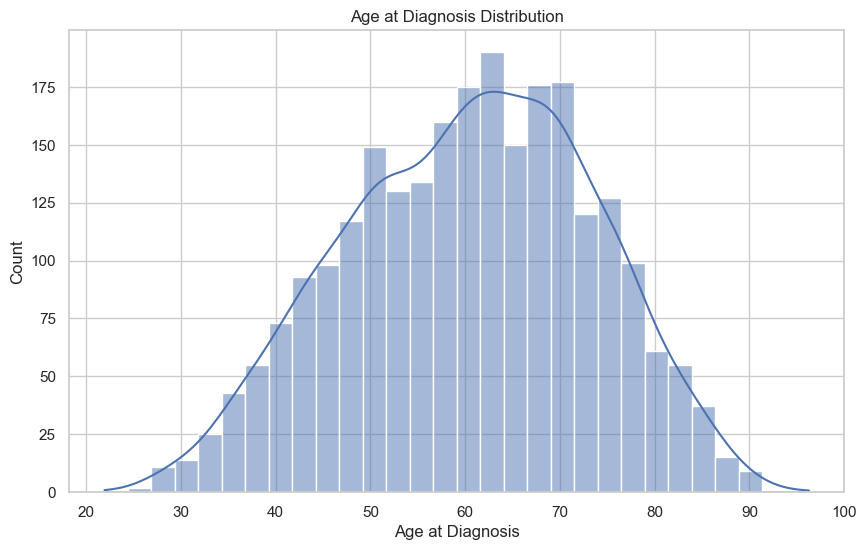

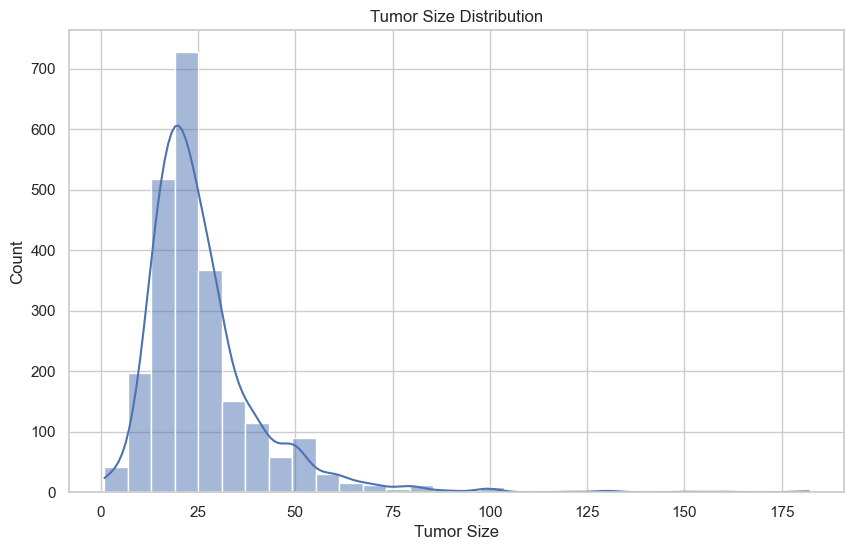

In [3]:
sns.histplot(df['Age at Diagnosis'].dropna(), bins=30, kde=True)
plt.title("Age at Diagnosis Distribution")
plt.show()

sns.histplot(df['Tumor Size'].dropna(), bins=30, kde=True)
plt.title("Tumor Size Distribution")
plt.show()


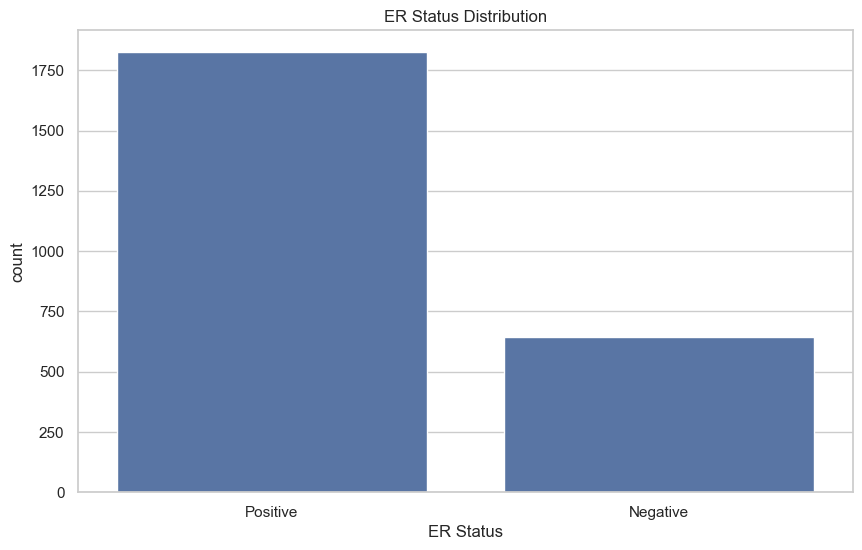

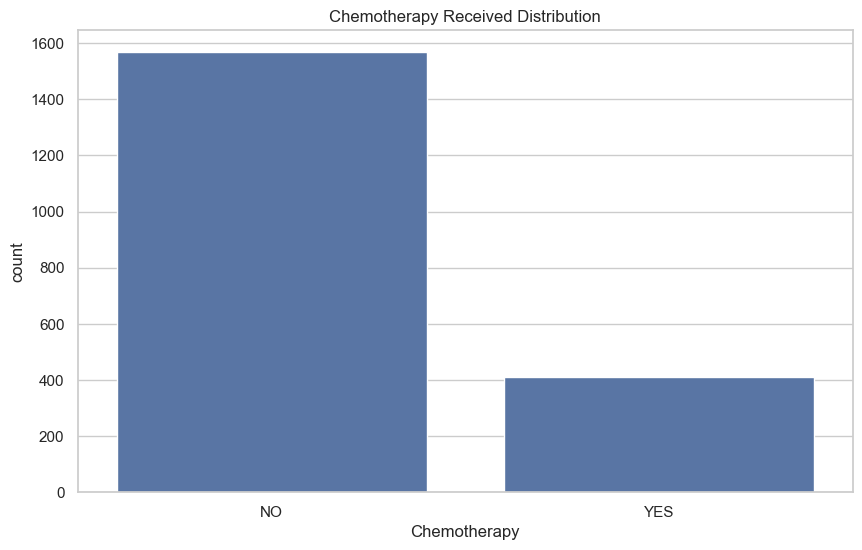

In [9]:
sns.countplot(data=df, x='ER Status')
plt.title("ER Status Distribution")
plt.show()

sns.countplot(data=df, x='Chemotherapy')
plt.title("Chemotherapy Received Distribution")
plt.show()


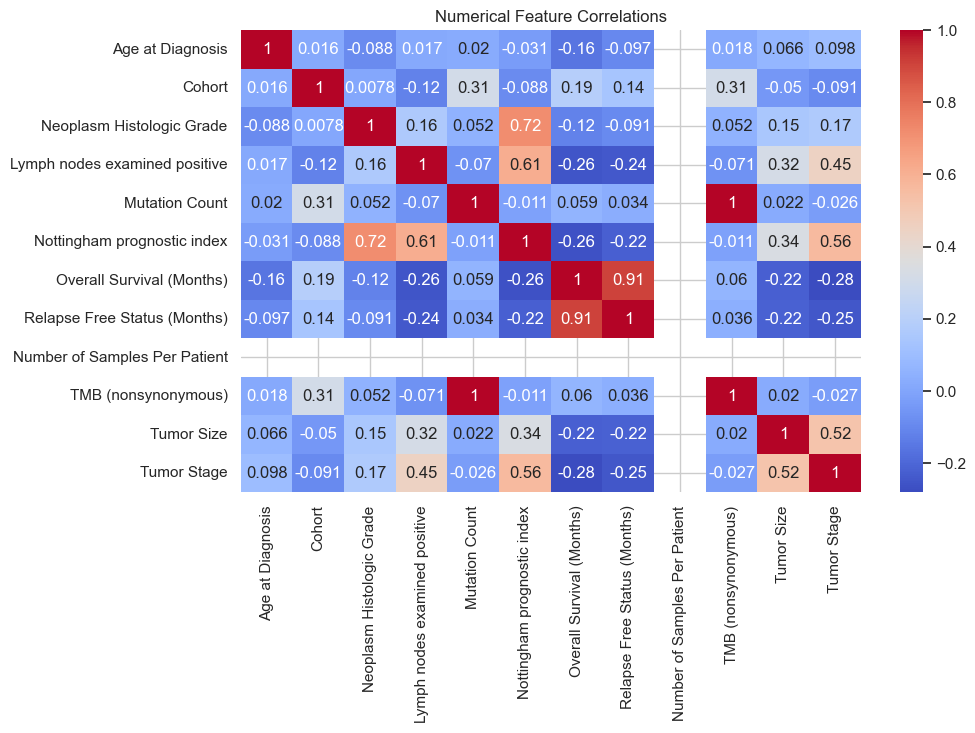

In [4]:
numerical_df = df.select_dtypes(include=[np.number]).dropna()
sns.heatmap(numerical_df.corr(), annot=True, cmap="coolwarm")
plt.title("Numerical Feature Correlations")
plt.show()


## Feature Commentary

- **Age at Diagnosis**: Can influence treatment strategy.
- **Tumor Size**: Correlates with stage and urgency of treatment.
- **ER / PR / HER2 Status**: Critical indicators for hormone-based therapies.
- **Therapy Types**: Chemotherapy, radiotherapy, hormone therapy — these are our RL actions.
- **Survival Status**: Will be used to define reward in RL setup.
